# Fuente de Datos Geoespaciales

Vamos a utilizar los archivos .shp y GEOJason que nos brinda la API de https://geo.gob.bo/#/, ya que contienen más información que sus KMLs




# 1. ASK

**Objetivo Principal**
Crear una plataforma interactiva y compartible que muestre el potencial turístico de Bolivia, integrando datos geoespaciales, turísticos y culturales.

**Preguntas Clave a Responder**
¿Cuáles son los principales atractivos turísticos por región?

¿Cómo se distribuyen las áreas protegidas y pueblos indígenas?

¿Qué actividades turísticas están disponibles en cada zona?

¿Cómo podemos integrar datos no geoespaciales al mapa?

¿Qué patrones espaciales existen en el turismo boliviano?

# 2. Prepare: carga y exploración de datos

In [1]:
import geopandas as gpd

In [2]:
bo = gpd.read_file("/content/municipios339.shp") #limites por municipios, son 344 segun archivo

In [3]:
bo_ap = gpd.read_file("/content/mmaya_aps.shp") #ap = areas_protegidas (193)

In [4]:
bo_gr = gpd.read_file("/content/grandes_regiones.shp") #gr = grandes_regiones (ALTIPLANO, AMAZONIA, GRAN CHACO, LLANOS TROPICALES, VALLES)


In [5]:
bo_pio = gpd.read_file("/content/indigena.shp") #Mapa de pueblos indigenas u originarios (471)

In [6]:
bo_act = gpd.read_file('/content/Mapa de actividades turisticas de Bolivia_2012.json') #Actividades turisticas (71)

In [7]:
bo_atr = gpd.read_file("/content/atractivos_turisticos_bolivia_2024.geojson.json") # Atractivos Turísticos 2024 (474)

In [8]:
import pandas as pd

bo_atr2 = pd.read_csv("/content/atractivos_turisticos2012 - atractivos_turisticos.csv") # Atractivos turísticos 2012 (API)
bo_atr2.head()

id  ogc_fid                       gml_id  \
0  atractivos_turisticos2012.1        1  atractivos_turisticos2012.1   
1  atractivos_turisticos2012.2        2  atractivos_turisticos2012.2   
2  atractivos_turisticos2012.3        3  atractivos_turisticos2012.3   
3  atractivos_turisticos2012.4        4  atractivos_turisticos2012.4   
4  atractivos_turisticos2012.5        5  atractivos_turisticos2012.5   

   id_atracti  id_municip  id_tipoatr        lat        lon  \
0         431          80          44 -20.747034 -68.233466   
1         396          59          44 -18.094515 -69.011993   
2         435          84          44 -20.746779 -68.051293   
3         341          55           6 -17.932437 -67.134790   
4         362          67         104 -16.558276 -68.674685   

                       nombre                               tipo_atrac  \
0    Aguas Termales de Empexa                         Sitios naturales   
1     Aguas Termales Manasaya                         Sitios naturales   
2  Aguas Termales Volcan Olca                         Sitios naturales   
3       Arenales de San Pedro                         Sitios naturales   
4       Artesania en Ceramica  Patrimonio y manifestaciones culturales   

                                          localizaci  
0                                Comunidad Canquella  
1  Comunidad de Manasaya  en una de las faldas de...  
2              Ladera del pueblo San Pedro de Quemes  
3                       a 2 km de la ciudad de Oruro  
4  Se las encuentra en el Centro Artesanal que es...

In [9]:
bo_atr2= gpd.GeoDataFrame(bo_atr2, geometry=gpd.points_from_xy(bo_atr2["lon"], bo_atr2["lat"]))
bo_atr2.head()

id  ogc_fid                       gml_id  \
0  atractivos_turisticos2012.1        1  atractivos_turisticos2012.1   
1  atractivos_turisticos2012.2        2  atractivos_turisticos2012.2   
2  atractivos_turisticos2012.3        3  atractivos_turisticos2012.3   
3  atractivos_turisticos2012.4        4  atractivos_turisticos2012.4   
4  atractivos_turisticos2012.5        5  atractivos_turisticos2012.5   

   id_atracti  id_municip  id_tipoatr        lat        lon  \
0         431          80          44 -20.747034 -68.233466   
1         396          59          44 -18.094515 -69.011993   
2         435          84          44 -20.746779 -68.051293   
3         341          55           6 -17.932437 -67.134790   
4         362          67         104 -16.558276 -68.674685   

                       nombre                               tipo_atrac  \
0    Aguas Termales de Empexa                         Sitios naturales   
1     Aguas Termales Manasaya                         Sitios naturales   
2  Aguas Termales Volcan Olca                         Sitios naturales   
3       Arenales de San Pedro                         Sitios naturales   
4       Artesania en Ceramica  Patrimonio y manifestaciones culturales   

                                          localizaci  \
0                                Comunidad Canquella   
1  Comunidad de Manasaya  en una de las faldas de...   
2              Ladera del pueblo San Pedro de Quemes   
3                       a 2 km de la ciudad de Oruro   
4  Se las encuentra en el Centro Artesanal que es...   

                      geometry  
0  POINT (-68.23347 -20.74703)  
1  POINT (-69.01199 -18.09452)  
2  POINT (-68.05129 -20.74678)  
3  POINT (-67.13479 -17.93244)  
4  POINT (-68.67468 -16.55828)

Checkeamos que todos tengas las mismas referencias geoespaciales para ver si se necesitan transformaciones

In [ ]:
bo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

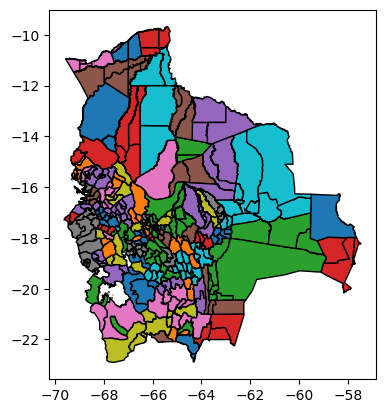

In [ ]:
bo.plot(column="provincia", edgecolor='black')

<Axes: >

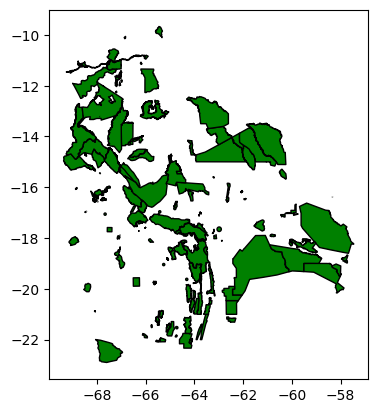

In [ ]:
bo_ap.plot(edgecolor='black', color = "green")

<Axes: >

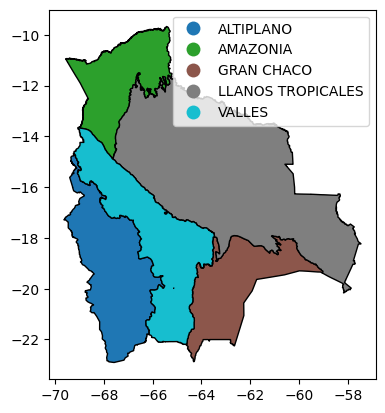

In [ ]:
bo_gr.plot(column='region', edgecolor='black', legend=True)

<Axes: >

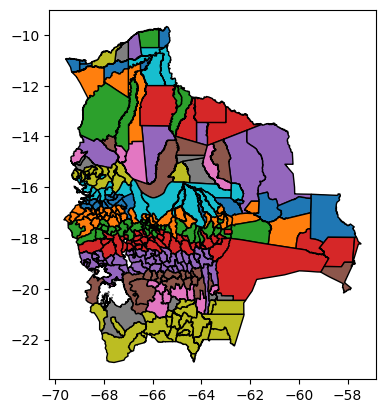

In [ ]:
bo_pio.plot(column='gml_id', edgecolor='black', legend=False)


<Axes: >

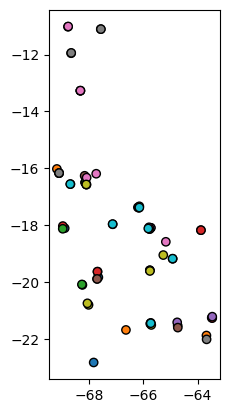

In [ ]:
bo_act.plot(column='nombre', edgecolor='black', legend=False)

<Axes: >

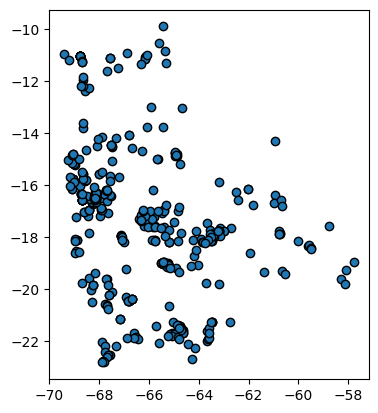

In [ ]:
bo_atr.plot(edgecolor='black', legend=False)

<Axes: >

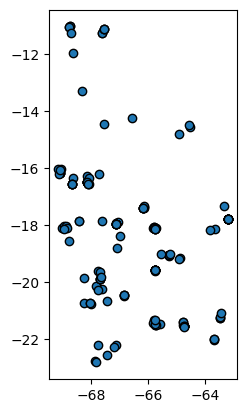

In [ ]:
bo_atr2.plot(edgecolor='black', legend=False)

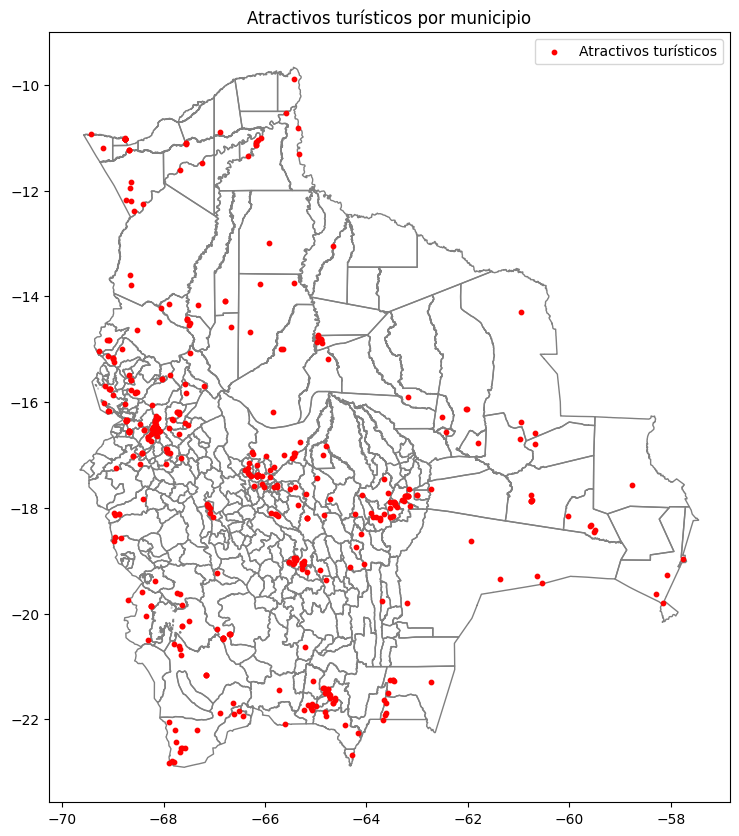

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 10))
bo.plot(ax=ax, edgecolor='gray', facecolor='none')
bo_atr.plot(ax=ax, color='red', markersize=10, label='Atractivos turísticos')
plt.legend()
plt.title('Atractivos turísticos por municipio')
plt.show()


## Exploración

Here's a summary of the shape and the first few rows for each of your GeoDataFrames:

**Municipios (bo):**

In [ ]:
display(bo.columns)
display(bo.head(1))

Index(['ogc_fid', 'id', 'objectid', 'c_ut', 'departamen', 'provincia',
       'municipio', 'capital', 'shape_leng', 'shape_area', 'geometry'],
      dtype='object')

ogc_fid    id  objectid    c_ut departamen provincia  municipio    capital  \
0        1  47.0     763.0  040505      Oruro   Litoral  Esmeralda  Esmeralda   

      shape_leng    shape_area  \
0  157773.865159  5.826799e+08   

                                            geometry  
0  POLYGON ((-68.26703 -18.81616, -68.26279 -18.8...

**Áreas Protegidas (bo_ap):**

In [ ]:
display(bo_ap.columns)
display(bo_ap.head(1))

Index(['ogc_fid', 'objectid', 'jurisdicci', 'depto', 'depto_2', 'nombre',
       'designa', 'geometry'],
      dtype='object')

ogc_fid  objectid jurisdicci  depto depto_2                 nombre  \
0        1       1.0  Municipal  Pando    None  Santa Rosa del AbunÃ¡   

                                     designa  \
0  Area Modelo de Manejo Integral del Bosque   

                                            geometry  
0  POLYGON ((-67.41609 -11.00201, -67.4165 -10.99...

**Grandes Regiones (bo_gr):**

In [ ]:
display(bo_gr.columns)
display(bo_gr.head(1))

Index(['ogc_fid', 'gml_id', 'region', 'shape_leng', 'shape_area', 'geometry'], dtype='object')

ogc_fid              gml_id     region  shape_leng  shape_area  \
0        1  Grandes_regiones.1  ALTIPLANO   27.911988   14.875311   

                                            geometry  
0  MULTIPOLYGON (((-65.58683 -19.49304, -65.58293...

**Pueblos Indígenas u Originarios (bo_pio):**

In [ ]:
display(bo_pio.columns)
display(bo_pio.head(1))

Index(['ogc_fid', 'gml_id', 'id', 'codseccion', 'munide', 'nuevos_mun',
       'codigo', 'cod_dep', 'nom_dep', 'cod_prov', 'nom_prov', 'cod_mun',
       'cat_sec', 'nom_mun', 'cantones', 'poblacion', 'area', 'perimeter',
       'prov', 'pob_tot', 'hombres', 'mujeres', 'tc_92_01', 'lengua',
       'zlengua', 'adscrip', 'zadscrip', 'pueblos', 'anal_tot', 'anal_hom',
       'anal_muj', 'tmi', 'part_per', 'tgf', 'tmn', 'nbi_92', 'nbi_01',
       'geometry'],
      dtype='object')

ogc_fid      gml_id     id codseccion  munide  nuevos_mun  codigo cod_dep  \
0        1  indigena.1  225.0     090501   301.0         0.0  090501       9   

  nom_dep cod_prov  ... anal_tot anal_hom anal_muj   tmi part_per  tgf    tmn  \
0   Pando        5  ...      9.6      4.6     19.3  97.1     61.8  6.8  198.0   

   nbi_92 nbi_01                                           geometry  
0    89.2   93.0  POLYGON ((-65.43669 -9.66602, -65.43426 -9.667...  

[1 rows x 38 columns]

**Actividades Turísticas (bo_act):**

In [ ]:
display(bo_act.columns)
display(bo_act.head(1))

Index(['id', 'ogc_fid', 'gml_id', 'id_activid', 'id_municip', 'id_tipoact',
       'latitud', 'longitud', 'nombre', 'tipo_activ', 'localizaci',
       'geometry'],
      dtype='object')

id  ogc_fid                         gml_id  \
0  actividades_turisticas_2012.1        1  actividades_turisticas_2012.1   

  id_activid id_municip id_tipoact   latitud  longitud       nombre  \
0         81         68         36 -19.88741 -67.69466  Agroturismo   

                  tipo_activ               localizaci  \
0  Experiencias comunitarias  Coqueza a 8 Km De Tahua   

                      geometry  
0  POINT (-67.69466 -19.88741)

**Atractivos Turísticos (bo_atr):**

In [ ]:
display(bo_atr.columns)
display(bo_atr.head())

Index(['id', 'ogc_fid', 'jerarquÍa', 'departamen', 'provincia', 'municipio',
       'comunidad', 'nombre de', 'categoria', 'vocaciÓn', 'sitios_tur',
       'temporalid', 'limitacion', 'alojamient', 'alimentaci', 'transporte',
       'comunicaci', 'actividade', 'descripcio', 'responsabl', 'otras enti',
       'pertenenci', 'fuente', 'este', 'norte', 'geometry'],
      dtype='object')

id  ogc_fid jerarquÍa  departamen  \
0  completo_atractivos_tcos.1        1       III      LA PAZ   
1  completo_atractivos_tcos.2        2        II  SANTA CRUZ   
2  completo_atractivos_tcos.3        3      None  SANTA CRUZ   
3  completo_atractivos_tcos.4        4        IV  SANTA CRUZ   
4  completo_atractivos_tcos.5        5      None  SANTA CRUZ   

                                           provincia  \
0                                       FRANZ TAMAYO   
1                                   ANDRES DE IBAÑEZ   
2                                    ITÉNEZ, VELASCO   
3                                           MISIONES   
4  ÑUFLO DE CHAVEZ, JOSÉ MIGUEL DE VALAZCO, CHIQU...   

                                           municipio        comunidad  \
0                                              APOLO             None   
1                                         SANTA CRUZ  SANTA CRUZ BENI   
2                     SAN IGNACIO DE VELASCO, BAURES             None   
3                              SAN JOSE DE CHIQUITOS             None   
4  CONCEPCIÓN, SAN XAVIER, SAN ANTONIO DE\nLOMERÍ...             None   

                             nombre de categoria  \
0     COMUNIDAD SANTA \nCRUZ DEL VALLE      None   
1                            RIO PIRAI         1   
2  PARQUE NACIONAL NOEL KEMPFF MERCADO         1   
3                  MISIONES JESUITICAS      None   
4                  MISIONES JESUÍTICAS      None   

                             vocaciÓn  ...  \
0  TURISMO VIVENCIAL \nY PAISAJISTICO  ...   
1    TURISMO DE NATURALEZA Y AVENTURA  ...   
2    TURISMO DE NATURALEZA Y AVENTURA  ...   
3                    TURISMO CULTURAL  ...   
4                    TURISMO CULTURAL  ...   

                                          comunicaci  \
0  APOLO CUENTA CON SERVICIO DE TELEFONIA MOVIL E...   
1                                 ENTEL, TIGO Y VIVA   
2                         ENTEL, CON MAYOR COBERTURA   
3                                       ENTEL Y TIGO   
4                                       ENTEL Y TIGO   

                                          actividade  \
0  CONVIVENCIA CON LA NATURALEZA, OBSERVACIÓN DE ...   
1  PASEOS, OBSERVACIÓN DE FLORA Y FAUNA, ACTIVIDA...   
2  OBSERVACIÓN DE FLORA Y FAUNA, PAISAJISMO, TURI...   
3         PASEOS EN BOTE, TREKKING, TURISMO CULTURAL   
4  PASEOS EN BOTE, TREKKING, TURISMO CULTURAL Y R...   

                                          descripcio  \
0                                              BUENO   
1  DIFICULTAD EN EL MANEJO DE RESIDUOS SOLIDOS, E...   
2  EL PARQUE ESTA CONSERVADO Y PROTEGIDO AUNQUE, ...   
3                                          EXCELENTE   
4  MANTENIMIENTO CONSTANTE POR PARTE DE LA POBLAC...   

                                          responsabl  \
0                                MUNICIPIO DE LA PAZ   
1          GOBIERNO AUTÓNOMO MUNICIPAL DE SANTA CRUZ   
2                                             SERNAP   
3  GOBIERNO AUTONOMO MUNICIPAL DE SAN JOSE DE CHI...   
4  GOBIERNOS AUTONOMOS DE LOS MUNICIPIOS CORRESPO...   

                                      otras enti         pertenenci  \
0                                          APOLO  ALCALDIA DE APOLO   
1  GOBIERNO AUTÓNOMO DEPARTAMENTAL DE SANTA CRUZ            PÚBLICO   
2  GOBIERNO AUTÓNOMO DEPARTAMENTAL DE SANTA CRUZ            PÚBLICO   
3  GOBIERNO AUTONOMO DEPARTMANETAL DE SANTA CRUZ  PUBLICO Y PRIVADO   
4  GOBIERNO AUTÓNOMO DEPARTAMENTAL DE SANTA CRUZ            PÚBLICO   

                                              fuente    este   norte  \
0  FICHA DE INVENTARIACIÓN TURÍSTICA, UMSA, CARRE... -68.526 -14.639   
1  ELABORACIÓN PROPIA EN BASE A RECOPILACIÓN DE F... -63.527 -18.169   
2  ELABORACIÓN PROPIA EN BASE A RECOPILACIÓN DE F... -60.949 -14.290   
3  ELABORACIÓN PROPIA EN BASE A RECOPILACIÓN DE F... -60.742 -17.846   
4  ELABORACIÓN PROPIA EN BASE A RECOPILACIÓN DE F... -62.505 -16.274   

                  geometry  
0  POINT (-68.526 -14.639)  
1  POINT (

Atractivos Turísticos 2 (bo_atr2):

In [14]:
display(bo_atr2.columns)
display(bo_atr2.head())

Index(['id', 'ogc_fid', 'gml_id', 'id_atracti', 'id_municip', 'id_tipoatr',
       'lat', 'lon', 'nombre', 'tipo_atrac', 'localizaci', 'geometry'],
      dtype='object')

id  ogc_fid                       gml_id  \
0  atractivos_turisticos2012.1        1  atractivos_turisticos2012.1   
1  atractivos_turisticos2012.2        2  atractivos_turisticos2012.2   
2  atractivos_turisticos2012.3        3  atractivos_turisticos2012.3   
3  atractivos_turisticos2012.4        4  atractivos_turisticos2012.4   
4  atractivos_turisticos2012.5        5  atractivos_turisticos2012.5   

   id_atracti  id_municip  id_tipoatr        lat        lon  \
0         431          80          44 -20.747034 -68.233466   
1         396          59          44 -18.094515 -69.011993   
2         435          84          44 -20.746779 -68.051293   
3         341          55           6 -17.932437 -67.134790   
4         362          67         104 -16.558276 -68.674685   

                       nombre                               tipo_atrac  \
0    Aguas Termales de Empexa                         Sitios naturales   
1     Aguas Termales Manasaya                         Sitios naturales   
2  Aguas Termales Volcan Olca                         Sitios naturales   
3       Arenales de San Pedro                         Sitios naturales   
4       Artesania en Ceramica  Patrimonio y manifestaciones culturales   

                                          localizaci  \
0                                Comunidad Canquella   
1  Comunidad de Manasaya  en una de las faldas de...   
2              Ladera del pueblo San Pedro de Quemes   
3                       a 2 km de la ciudad de Oruro   
4  Se las encuentra en el Centro Artesanal que es...   

                      geometry  
0  POINT (-68.23347 -20.74703)  
1  POINT (-69.01199 -18.09452)  
2  POINT (-68.05129 -20.74678)  
3  POINT (-67.13479 -17.93244)  
4  POINT (-68.67468 -16.55828)

# Process

In [ ]:
print("bo_atr - Tipos de atractivos únicos:")
print(bo_atr['actividade'].unique()[:5])

print("\nbo_atr2 - Tipos de atractivos únicos:")
print(bo_atr2['tipo_atrac'].unique()[:5])

bo_atr - Tipos de atractivos únicos:
['CONVIVENCIA CON LA NATURALEZA, OBSERVACIÓN DE FLORA Y FAUNA'
 'PASEOS, OBSERVACIÓN DE FLORA Y FAUNA, ACTIVIDADES DE TURISMO DE AVENTURA, PESCA DEPORTIVA'
 'OBSERVACIÓN DE FLORA Y FAUNA, PAISAJISMO, TURISMO DE NATURALEZA Y AVENTURA'
 'PASEOS EN BOTE, TREKKING, TURISMO CULTURAL'
 'PASEOS EN BOTE, TREKKING, TURISMO CULTURAL Y RELIGIOSO.']

bo_atr2 - Tipos de atractivos únicos:
['Sitios naturales' 'Patrimonio y manifestaciones culturales'
 'Obras arquitectonicas y civiles']


In [10]:
print("Departamentos en dataset municipios:")
print(bo['departamen'].unique())

Departamentos en dataset municipios:
['Oruro' 'PotosÃ\xad' None 'Cochabamba' 'La Paz' 'Santa Cruz' 'Chuquisaca'
 'Beni' 'Tarija' 'Pando']


In [ ]:
print("Municipio en bo_act:", bo_act['id_municip'].head(3))
print("Municipio en bo_atr:", bo_atr['municipio'].head(3))
print("Municipio en bo:", bo['municipio'].head(3))

Municipio en bo_act: 0    68
1    50
2    59
Name: id_municip, dtype: object
Municipio en bo_atr: 0                             APOLO
1                        SANTA CRUZ
2    SAN IGNACIO DE VELASCO, BAURES
Name: municipio, dtype: object
Municipio en bo: 0                 Esmeralda
1    Santuario de Quillacas
2            Pampa Aullagas
Name: municipio, dtype: object


In [ ]:
print("Geometrías válidas en bo:", bo.geometry.is_valid.all())
print("Geometrías válidas en bo_ap:", bo_ap.geometry.is_valid.all())

Geometrías válidas en bo: True
Geometrías válidas en bo_ap: False


In [ ]:
# Corregir geometrías inválidas en bo_ap
print(f"Geometrías inválidas en bo_ap: {sum(~bo_ap.geometry.is_valid)}")
bo_ap = bo_ap[bo_ap.geometry.is_valid].copy()

Geometrías inválidas en bo_ap: 6


In [11]:
# Corregir encoding y normalizar nombres
print("Departamentos antes de limpieza:")
print(bo['departamen'].unique())

# Corregir PotosÃ\xad
bo['departamen'] = bo['departamen'].str.replace('PotosÃ\xad', 'Potosí')
# Manejar valores nulos si los hay
bo = bo[bo['departamen'].notna()].copy()

Departamentos antes de limpieza:
['Oruro' 'PotosÃ\xad' None 'Cochabamba' 'La Paz' 'Santa Cruz' 'Chuquisaca'
 'Beni' 'Tarija' 'Pando']


In [12]:
# Corregir encoding y normalizar nombres
print("Departamentos después de limpieza:")
print(bo['departamen'].unique())

Departamentos después de limpieza:
['Oruro' 'Potosí' 'Cochabamba' 'La Paz' 'Santa Cruz' 'Chuquisaca' 'Beni'
 'Tarija' 'Pando']


In [15]:
# Create GeoJson layers for departments and provinces from the 'bo' GeoDataFrame
departamentos = bo.dissolve(by='departamen')

provincias = bo.dissolve(by='provincia')

In [16]:
departamentos

geometry  ogc_fid     id  \
departamen                                                                      
Beni        POLYGON ((-65.5945 -16.46011, -65.59475 -16.46...       47  286.0   
Chuquisaca  POLYGON ((-65.20162 -21.0707, -65.20197 -21.07...       37  266.0   
Cochabamba  POLYGON ((-66.60629 -18.0845, -66.60751 -18.08...        7   61.0   
La Paz      MULTIPOLYGON (((-69.21121 -17.98525, -69.22212...       16   86.0   
Oruro       MULTIPOLYGON (((-68.40908 -19.43849, -68.40944...        1   47.0   
Pando       POLYGON ((-67.99626 -11.84968, -67.99744 -11.8...      137  156.0   
Potosí      MULTIPOLYGON (((-68.14836 -20.53769, -68.14823...        4   55.0   
Santa Cruz  POLYGON ((-63.69858 -20.14689, -63.69928 -20.1...       24   81.0   
Tarija      POLYGON ((-64.09912 -22.33808, -64.09807 -22.3...       51   35.0   

            objectid    c_ut            provincia        municipio  \
departamen                                                           
Beni          1029.0  080601              MarbÃ¡n           Loreto   
Chuquisaca    1005.0  010702            Nor Cinti        San Lucas   
Cochabamba    2515.0  030201              Campero          Aiquile   
La Paz         803.0  021803  Gualberto Villarroe       Chacarilla   
Oruro          763.0  040505              Litoral        Esmeralda   
Pando          875.0  090101     NicolÃ¡s SuÃ¡rez           Cobija   
Potosí         772.0  050203      Rafael Bustillo        Llallagua   
Santa Cruz     798.0  071402        GermÃ¡n Busch  Puerto Quijarro   
Tarija         754.0  060303           Gran Chaco     Villa Montes   

                    capital     shape_leng    shape_area  
departamen                                                
Beni                 Loreto  617427.951550  6.777967e+09  
Chuquisaca        San Lucas  398014.000126  3.877202e+09  
Cochabamba          Aiquile  299960.196725  2.667053e+09  
La Paz           Chacarilla  102742.932541  3.606942e+08  
Oruro             Esmeralda  157773.865159  5.826799e+08  
Pando                Cobija  134470.814682  4.500341e+08  
Potosí            Llallagua  108042.750490  5.243827e+08  
Santa Cruz  Puerto Quijarro  305366.680308  1.429552e+09  
Tarija         Villa Montes  555303.709620  1.083704e+10

In [17]:
provincias

geometry  \
provincia                                                               
Abaroa              MULTIPOLYGON (((-66.54577 -19.38625, -66.55088...   
Abel Iturralde      POLYGON ((-67.53877 -13.97721, -67.53949 -13.9...   
AbunÃ¡              POLYGON ((-67.00279 -10.97036, -67.00376 -10.9...   
Alonso de IbÃ¡Ã±ez  POLYGON ((-66.55916 -18.07816, -66.55878 -18.0...   
AndrÃ©s IbÃ¡Ã±ez    POLYGON ((-63.08615 -18.02643, -63.08824 -18.0...   
...                                                               ...   
Warnes              POLYGON ((-63.03174 -17.0425, -63.03132 -17.04...   
Yacuma              POLYGON ((-65.3328 -13.58862, -65.33843 -13.59...   
YamparÃ¡ez          POLYGON ((-64.90368 -19.37296, -64.90593 -19.3...   
ZudÃ¡Ã±ez           POLYGON ((-64.83923 -19.46515, -64.8395 -19.46...   
Ãuflo De ChÃ¡vez   POLYGON ((-61.85077 -17.03503, -61.85061 -17.0...   

                    ogc_fid     id  objectid    c_ut  departamen  \
provincia                                                          
Abaroa                    2   48.0     764.0  040202       Oruro   
Abel Iturralde          217  152.0     871.0  021502      La Paz   
AbunÃ¡                  229  168.0     888.0  090401       Pando   
Alonso de IbÃ¡Ã±ez        5   56.0     773.0  050702      Potosí   
AndrÃ©s IbÃ¡Ã±ez         33  236.0     969.0  070104  Santa Cruz   
...                     ...    ...       ...     ...         ...   
Warnes                  281  248.0     983.0  070202  Santa Cruz   
Yacuma                  218  153.0     872.0  080401        Beni   
YamparÃ¡ez              210  216.0     947.0  010601  Chuquisaca   
ZudÃ¡Ã±ez               211  217.0     948.0  010301  Chuquisaca   
Ãuflo De ChÃ¡vez        72   40.0    1202.0  071101  Santa Cruz   

                                 municipio                 capital  \
provincia                                                            
Abaroa              Santuario de Quillacas  Santuario de Quillacas   
Abel Iturralde            San Buenaventura        San Buenaventura   
AbunÃ¡                          Santa Rosa              Santa Rosa   
Alonso de IbÃ¡Ã±ez                Caripuyo                Caripuyo   
AndrÃ©s IbÃ¡Ã±ez                La Guardia              La Guardia   
...                                    ...                     ...   
Warnes                         Okinawa Uno             Okinawa Uno   
Yacuma                           Santa Ana     Santa Ana de Yacuma   
YamparÃ¡ez                        Tarabuco                Tarabuco   
ZudÃ¡Ã±ez                         ZudaÃ±ez         Villa ZudÃ¡Ã±ez   
Ãuflo De ChÃ¡vez              ConcepciÃ³n             ConcepciÃ³n   

                      shape_leng    shape_area  
provincia                                       
Abaroa              1.688221e+05  9.275470e+08  
Abel Iturralde      3.169826e+05  2.949463e+09  
AbunÃ¡              4.440465e+05  4.416076e+09  
Alonso de IbÃ¡Ã±ez  1.277101e+05  5.181230e+08  
AndrÃ©s IbÃ¡Ã±ez    2.304127e+05  9.712286e+08  
...                          ...           ...  
Warnes              1.859865e+05  1.026046e+09  
Yacuma              9.387296e+05  2.117863e+10  
YamparÃ¡ez          2.089271e+05  1.076620e+09  
ZudÃ¡Ã±ez           1.327724e+05  6.539809e+08  
Ãuflo De ChÃ¡vez   1.277411e+06  2.894302e+10  

[110 rows x 10 columns]

# Mapas: Visualizaciones generales

In [29]:
import folium
from folium import plugins
from folium.plugins import HeatMap

In [35]:
# Tu estilo oscuro para municipios
estilo_claro = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}
estilo_oscuro = {'fillOpacity': 0, 'color': '#000000', 'weight': 0.5}


departamentos, provincias y municipios

In [44]:
import folium

m = folium.Map(location=[-16.5, -64.5], zoom_start=6, tiles=None)

# Añadir capas con nombre
folium.TileLayer('OpenStreetMap', name='OSM').add_to(m)
folium.TileLayer('CartoDB positron', name='Positron').add_to(m)

# Añadir capas GeoJson con nombre
folium.GeoJson(departamentos, name='Departamentos').add_to(m)
folium.GeoJson(provincias, name='Provincias').add_to(m)
folium.GeoJson(bo, style_function=lambda x: estilo_oscuro, name="Municipios",
    tooltip=folium.GeoJsonTooltip(
        fields=['departamen', 'provincia', 'municipio'],
        aliases=['Departamento:', 'Provincia:', 'Municipio:'])).add_to(m)
# Añadir el control de capas
folium.LayerControl().add_to(m)

# Mostrar el mapa
m

Output hidden; open in https://colab.research.google.com to view.

Departamentos y municipios

In [45]:
import matplotlib.pyplot as plt

# Lista única de departamentos
departamentos_unicos = bo['departamen'].unique()

# Generar colores únicos usando colormap
colormap = plt.cm.get_cmap('tab20', len(departamentos_unicos))
colores_departamento = {
    depto: f'#{int(colormap(i)[0]*255):02x}{int(colormap(i)[1]*255):02x}{int(colormap(i)[2]*255):02x}'
    for i, depto in enumerate(departamentos_unicos)
}


/tmp/ipython-input-2055337214.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(departamentos_unicos))


In [46]:
def estilo_por_departamento(feature):
    depto = feature['properties']['departamen']
    color = colores_departamento.get(depto, '#999999')  # color gris si no se encuentra
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    }


In [53]:
m = folium.Map(location=[-16.5, -64.5], zoom_start=6, tiles='CartoDB positron')

tooltip = folium.GeoJsonTooltip(
    fields=['departamen', 'provincia', 'municipio'],
    aliases=['Departamento:', 'Provincia:', 'Municipio:']
)

folium.GeoJson(
    bo,
    style_function=estilo_por_departamento,
    name="Municipios",
    tooltip=tooltip
).add_to(m)

folium.LayerControl().add_to(m)
# m.save("mapa_coloreado.html")
m

Output hidden; open in https://colab.research.google.com to view.

Mapa de pueblos indigenas u originarios por departamento, provincia y municipio

In [56]:
import matplotlib.pyplot as plt

# Lista única de pueblos
pueblos_unicos = bo_pio['pueblos'].dropna().unique()

# Generar colores únicos usando colormap
colormap = plt.cm.get_cmap('tab20', len(pueblos_unicos))
colores_pueblos = {
    pueblo: f'#{int(colormap(i)[0]*255):02x}{int(colormap(i)[1]*255):02x}{int(colormap(i)[2]*255):02x}'
    for i, pueblo in enumerate(pueblos_unicos)
}


/tmp/ipython-input-3597411654.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = plt.cm.get_cmap('tab20', len(pueblos_unicos))


In [57]:
def estilo_por_pueblo(feature):
    pueblo = feature['properties'].get('pueblos')
    color = colores_pueblos.get(pueblo, '#999999')  # gris si no se encuentra
    return {
        'fillColor': color,
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.6
    }


In [59]:
m = folium.Map(location=[-16.5, -64.5], zoom_start=6, tiles='CartoDB positron')

tooltip_pueblos = folium.GeoJsonTooltip(
    fields=['pueblos', 'nom_dep', 'nom_prov', 'nom_mun'],
    aliases=['Pueblo:', 'Departamento:', 'Provincia:', 'Municipio:']
)


folium.GeoJson(
    bo_pio,
    style_function=estilo_por_pueblo,
    name="Pueblos Indígenas u Originarios",
    tooltip=tooltip_pueblos
).add_to(m)


folium.LayerControl().add_to(m)
# m.save("mapa_pueblos_indigenas.html")
m

Output hidden; open in https://colab.research.google.com to view.

Heatmap de Atractivos Turisticos 2024

In [52]:
m2 = folium.Map(
    location=[-16.5, -64.5],
    zoom_start=6,
    tile = "cartodbpositron")

estilo_claro = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data = [[point.y, point.x] for point in bo_atr.geometry if point is not None] # we use bo_atr

HeatMap(data = heatmap_data, name = 'Mapa de Calor', radius = 20).add_to(m2)
folium.GeoJson(departamentos, name = 'Departamento', style_function= lambda x: estilo_oscuro).add_to(m2)

folium.TileLayer("cartodbdark_matter", name = "Dark").add_to(m2)

#vamos a poner un estilo oscuro donde el calor es rojo
estilo_oscuro = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data_dark = [[point.y, point.x] for point in bo_atr.geometry if point is not None]

HeatMap(data = heatmap_data_dark, name = 'Mapa de Calor', radius = 20, gradient={"0":"grey", "1":"red"}, show = False).add_to(m2)
folium.GeoJson(departamentos, name = 'Departamentos_Claro', style_function= lambda x: estilo_claro, show = False ).add_to(m2)

folium.TileLayer("cartodbpositron", name = "Positron").add_to(m2)

folium.LayerControl().add_to(m2)

m2

Output hidden; open in https://colab.research.google.com to view.

Atractivos Turísticos 2012

In [24]:
m2 = folium.Map(
    location=[-16.5, -64.5],
    zoom_start=6,
    tile = "cartodbpositron")

estilo_claro = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data = [[point.y, point.x] for point in bo_atr2.geometry if point is not None] # we use bo_atr

HeatMap(data = heatmap_data, name = 'Mapa de Calor', radius = 20).add_to(m2)
folium.GeoJson(departamentos, name = 'Departamento', style_function= lambda x: estilo_claro).add_to(m2)

folium.TileLayer("cartodbdark_matter", name = "Dark").add_to(m2)

#vamos a poner un estilo oscuro donde el calor es rojo
estilo_oscuro = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data_dark = [[point.y, point.x] for point in bo_atr2.geometry if point is not None]

HeatMap(data = heatmap_data_dark, name = 'Mapa de Calor', radius = 20, gradient={"0":"grey", "1":"red"}, show = False).add_to(m2)
folium.GeoJson(provincias, name = 'provincias', style_function= lambda x: estilo_oscuro, show = False ).add_to(m2)

folium.TileLayer("cartodbpositron", name = "Positron").add_to(m2)

folium.LayerControl().add_to(m2)

m2

Output hidden; open in https://colab.research.google.com to view.

por actividades turisticas

In [25]:
m2 = folium.Map(
    location=[-16.5, -64.5],
    zoom_start=6,
    tile = "cartodbpositron")

estilo_claro = {'fillOpacity':0 ,'color' : '#ffffff', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data = [[point.y, point.x] for point in bo_act.geometry if point is not None] # we use bo_atr

HeatMap(data = heatmap_data, name = 'Mapa de Calor', radius = 20).add_to(m2)
folium.GeoJson(departamentos, name = 'Departamento', style_function= lambda x: estilo_claro).add_to(m2)

folium.TileLayer("cartodbdark_matter", name = "Dark").add_to(m2)

#vamos a poner un estilo oscuro donde el calor es rojo
estilo_oscuro = {'fillOpacity':0 ,'color' : '#000000', 'weight': 0.5}

# Extract coordinates from the geometry column for the heatmap
heatmap_data_dark = [[point.y, point.x] for point in bo_act.geometry if point is not None]

HeatMap(data = heatmap_data_dark, name = 'Mapa de Calor', radius = 20, gradient={"0":"grey", "1":"red"}, show = False).add_to(m2)
folium.GeoJson(provincias, name = 'provincias', style_function= lambda x: estilo_oscuro, show = False ).add_to(m2)

folium.TileLayer("cartodbpositron", name = "Positron").add_to(m2)

folium.LayerControl().add_to(m2)

m2

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
departamentos.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

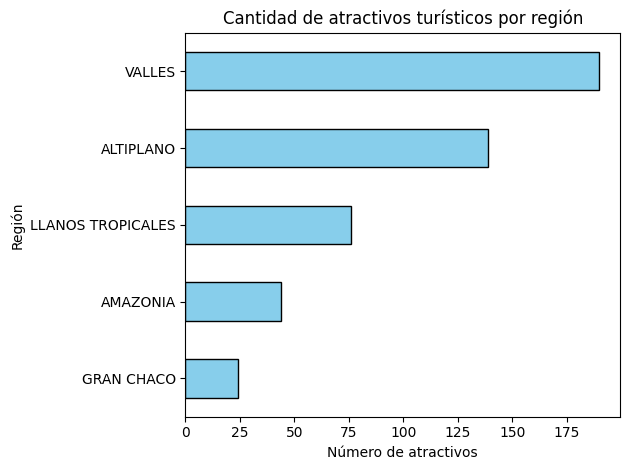

In [ ]:
# Spatial join entre atractivos y grandes regiones
bo_atr_reg = gpd.sjoin(bo_atr, bo_gr, how='left', predicate='intersects')

# Conteo por región
conteo = bo_atr_reg['region'].value_counts().sort_values()

# Gráfico
conteo.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Cantidad de atractivos turísticos por región')
plt.xlabel('Número de atractivos')
plt.ylabel('Región')
plt.tight_layout()
plt.show()


# Gráficos Interactivos

In [ ]:
import folium
from folium.plugins import MarkerCluster

# Centro aproximado de Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=5)

# Municipios
folium.GeoJson(bo, name='Municipios', style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray'}).add_to(m)

# Grandes regiones
folium.GeoJson(bo_gr, name='Regiones', style_function=lambda x: {'fillColor': 'transparent', 'color': 'black'}).add_to(m)

# Atractivos turísticos con popups
atr_cluster = MarkerCluster(name='Atractivos turísticos 2024').add_to(m)
for _, row in bo_atr.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=f"{row['nombre de']} ({row['categoria']})"
    ).add_to(atr_cluster)

folium.LayerControl().add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.

añadimos todas las tablas y un par de mejoras visuales para hacerlo ver más profesional

In [68]:
import folium
from folium.plugins import MarkerCluster

# Crear mapa centrado en Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=5, tiles='CartoDB positron')

# 🧱 Capas administrativas
folium.GeoJson(departamentos, name='Departamentos',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray', 'weight': 1}).add_to(m)

folium.GeoJson(provincias, name='Provincias',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'darkgray', 'weight': 0.5}).add_to(m)

folium.GeoJson(bo, name='Municipios',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'lightgray', 'weight': 0.3}).add_to(m)

# 🏞️ Áreas Protegidas
ap_cluster = MarkerCluster(name='Áreas Protegidas').add_to(m)
for _, row in bo_ap.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Designación:</i> {row['designa']}
        """, max_width=300),
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(ap_cluster)

# 🧬 Pueblos Indígenas u Originarios
pio_cluster = MarkerCluster(name='Pueblos Indígenas u Originarios').add_to(m)
for _, row in bo_pio.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['pueblos']}</b><br>
            <i>Población total:</i> {row['pob_tot']}
        """, max_width=300),
        icon=folium.Icon(color='darkred', icon='user')
    ).add_to(pio_cluster)

# 🎭 Actividades Turísticas
act_cluster = MarkerCluster(name='Actividades Turísticas').add_to(m)
for _, row in bo_act.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_activ']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='purple', icon='star')
    ).add_to(act_cluster)

# 🗺️ Atractivos Turísticos 2024
atr_cluster = MarkerCluster(name='Atractivos Turísticos 2024').add_to(m)
for _, row in bo_atr.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre de']}</b><br>
            <i>Vocación:</i> {row['vocaciÓn']}<br>
            <i>Actividades:</i> {row['actividade']}<br>
            <i>Descripción:</i> {row['descripcio']}
        """, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(atr_cluster)

# 📸 Atractivos Turísticos 2012
atr2_cluster = MarkerCluster(name='Atractivos Turísticos 2012').add_to(m)
for _, row in bo_atr2.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_atrac']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='orange', icon='camera')
    ).add_to(atr2_cluster)

# 🎨 Leyenda visual de íconos
legend_html = """
<div style="
    position: fixed;
    bottom: 20px;
    left: 20px;
    width: 200px;
    background-color: white;
    border:2px solid gray;
    z-index:9999;
    font-size:14px;
    padding: 10px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
">
<b>🗺️ Leyenda de íconos</b><br>
<i class="fa fa-map-marker fa-lg" style="color:blue"></i> Atractivos 2024<br>
<i class="fa fa-camera fa-lg" style="color:orange"></i> Atractivos 2012<br>
<i class="fa fa-star fa-lg" style="color:purple"></i> Actividades turísticas<br>
<i class="fa fa-leaf fa-lg" style="color:green"></i> Áreas protegidas<br>
<i class="fa fa-user fa-lg" style="color:darkred"></i> Pueblos indígenas<br>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# 🎛️ Control de capas
folium.LayerControl(collapsed=False).add_to(m)

# Mostrar mapa
m


Output hidden; open in https://colab.research.google.com to view.

In [64]:
import folium
from folium.plugins import MarkerCluster

# Crear mapa centrado en Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=5)

# 🧱 Capas base: Departamentos y Regiones
folium.GeoJson(departamentos, name='Departamentos',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray'}).add_to(m)

folium.GeoJson(bo_gr, name='Regiones',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'black'}).add_to(m)

# 🗺️ Atractivos turísticos 2024
atr_cluster = MarkerCluster(name='Atractivos turísticos 2024').add_to(m)
for _, row in bo_atr.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"<b>{row['nombre de']}</b><br>Categoría: {row['categoria']}", max_width=250),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(atr_cluster)

# 🏞️ Áreas protegidas
ap_cluster = MarkerCluster(name='Áreas Protegidas').add_to(m)
for _, row in bo_ap.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"<b>{row['nombre']}</b><br>Designación: {row['designa']}", max_width=250),
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(ap_cluster)

# 🎭 Actividades turísticas
act_cluster = MarkerCluster(name='Actividades Turísticas').add_to(m)
for _, row in bo_act.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"<b>{row['nombre']}</b><br>Tipo: {row['tipo_activ']}", max_width=250),
        icon=folium.Icon(color='purple', icon='star')
    ).add_to(act_cluster)

# 📸 Atractivos turísticos 2012
atr2_cluster = MarkerCluster(name='Atractivos turísticos 2012').add_to(m)
for _, row in bo_atr2.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"<b>{row['nombre']}</b><br>Tipo: {row['tipo_atrac']}", max_width=250),
        icon=folium.Icon(color='orange', icon='camera')
    ).add_to(atr2_cluster)

# 🎛️ Control de capas
folium.LayerControl(collapsed=False).add_to(m)

# Mostrar mapa
m


Output hidden; open in https://colab.research.google.com to view.

In [65]:
import folium
from folium.plugins import MarkerCluster

# Crear mapa centrado en Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=5, tiles='CartoDB positron')

# 🧱 Capas administrativas
folium.GeoJson(departamentos, name='Departamentos',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray', 'weight': 1}).add_to(m)

folium.GeoJson(provincias, name='Provincias',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'darkgray', 'weight': 0.5}).add_to(m)

folium.GeoJson(bo, name='Municipios',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'lightgray', 'weight': 0.3}).add_to(m)

# 🏞️ Áreas Protegidas
ap_cluster = MarkerCluster(name='Áreas Protegidas').add_to(m)
for _, row in bo_ap.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Designación:</i> {row['designa']}
        """, max_width=300),
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(ap_cluster)

# 🧬 Pueblos Indígenas u Originarios
pio_cluster = MarkerCluster(name='Pueblos Indígenas u Originarios').add_to(m)
for _, row in bo_pio.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['pueblos']}</b><br>
            <i>Población total:</i> {row['pob_tot']}
        """, max_width=300),
        icon=folium.Icon(color='darkred', icon='user')
    ).add_to(pio_cluster)

# 🎭 Actividades Turísticas
act_cluster = MarkerCluster(name='Actividades Turísticas').add_to(m)
for _, row in bo_act.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_activ']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='purple', icon='star')
    ).add_to(act_cluster)

# 🗺️ Atractivos Turísticos 2024
atr_cluster = MarkerCluster(name='Atractivos Turísticos 2024').add_to(m)
for _, row in bo_atr.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre de']}</b><br>
            <i>Vocación:</i> {row['vocaciÓn']}<br>
            <i>Actividades:</i> {row['actividade']}<br>
            <i>Descripción:</i> {row['descripcio']}
        """, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(atr_cluster)

# 📸 Atractivos Turísticos 2012
atr2_cluster = MarkerCluster(name='Atractivos Turísticos 2012').add_to(m)
for _, row in bo_atr2.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_atrac']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='orange', icon='camera')
    ).add_to(atr2_cluster)

# 🎛️ Control de capas
folium.LayerControl(collapsed=False).add_to(m)

# Mostrar mapa
m


Output hidden; open in https://colab.research.google.com to view.

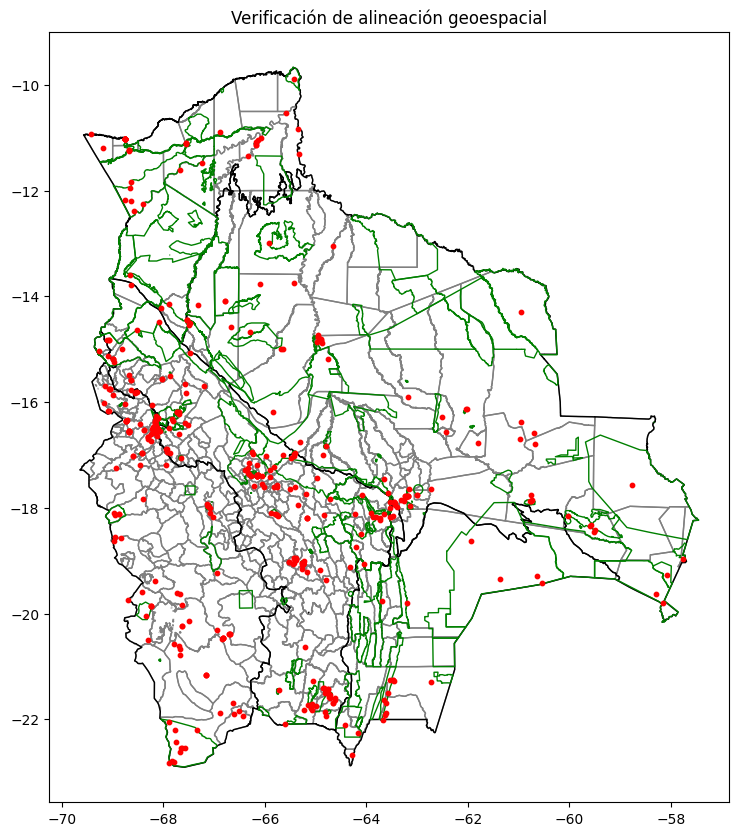

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))
bo.plot(ax=ax, edgecolor='gray', facecolor='none')
bo_gr.plot(ax=ax, edgecolor='black', facecolor='none')
bo_ap.plot(ax=ax, edgecolor='green', facecolor='none')
bo_atr.plot(ax=ax, color='red', markersize=10)
plt.title('Verificación de alineación geoespacial')
plt.show()


/usr/local/lib/python3.12/dist-packages/geopandas/plotting.py:950: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  ax.figure.canvas.draw_idle()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 145 (\x91) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


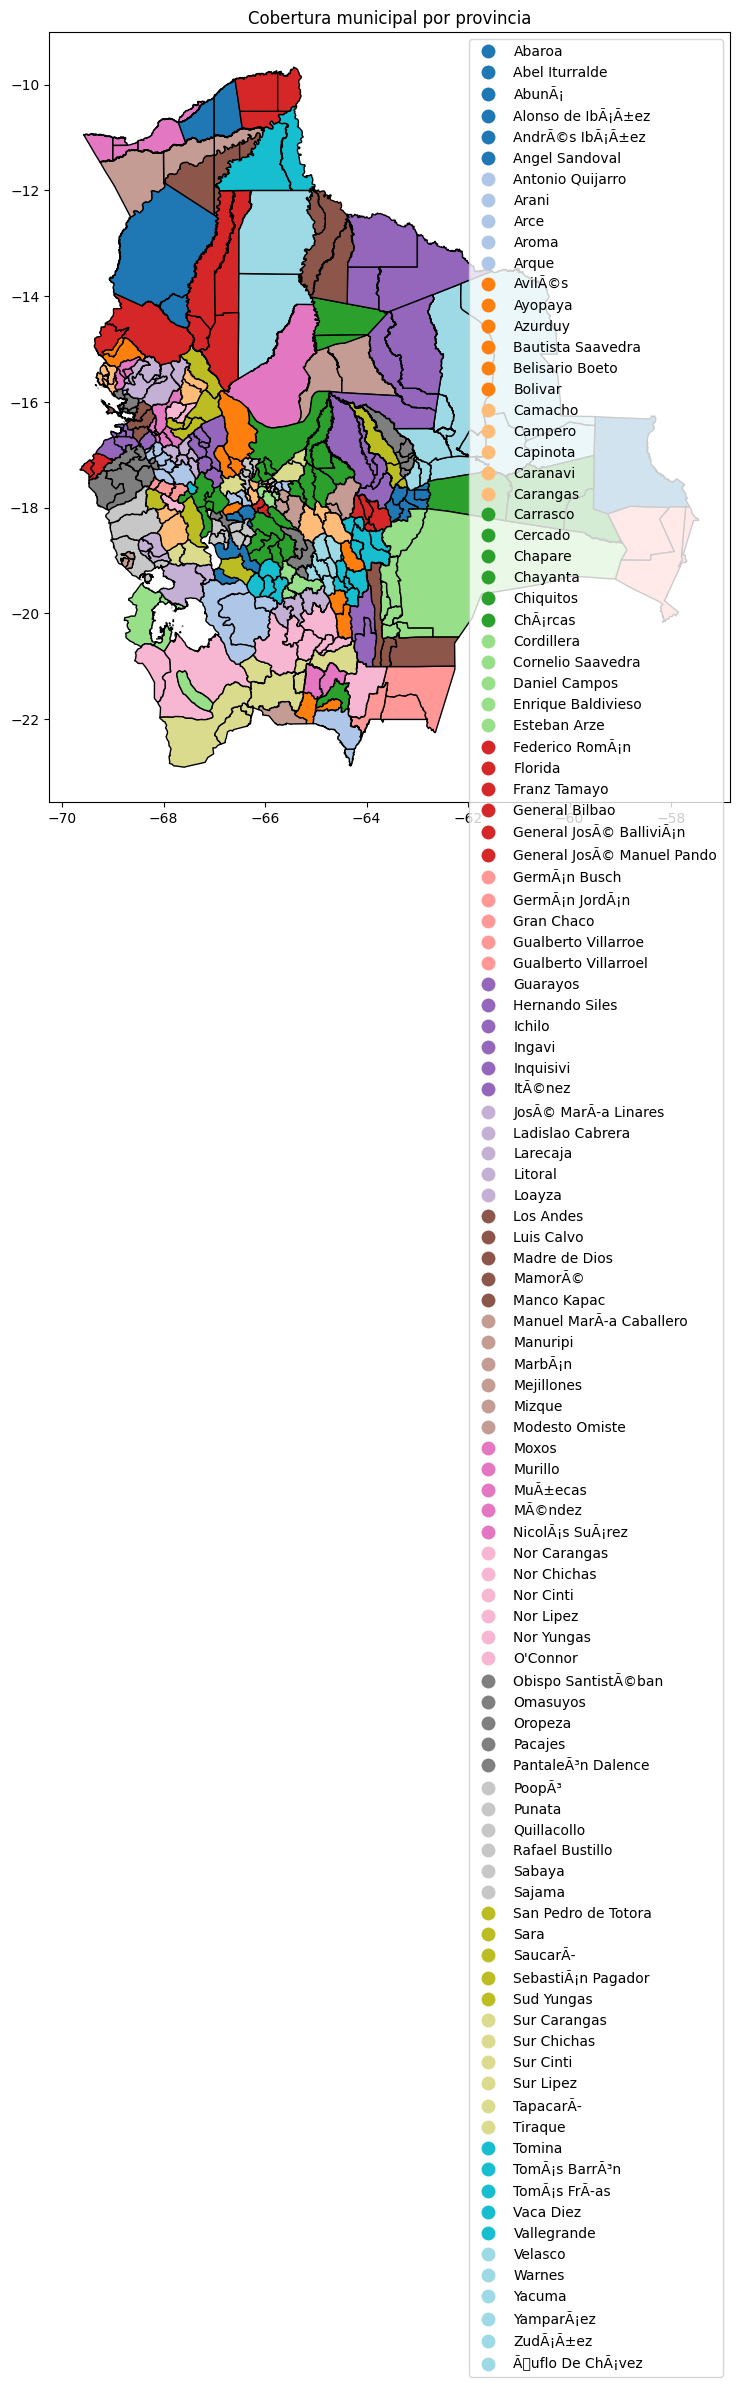

In [ ]:
bo.plot(column='provincia', cmap='tab20', edgecolor='black', legend=True, figsize=(10, 10))
plt.title('Cobertura municipal por provincia')
plt.show()


In [ ]:
m_combined = folium.Map(location=[-16.5, -64.5], zoom_start=5)

# Municipios layer
folium.GeoJson(bo, name='Municipios', style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray', 'weight': 1}).add_to(m_combined)

# Grandes regiones layer
folium.GeoJson(bo_gr, name='Regiones', style_function=lambda x: {'fillColor': 'transparent', 'color': 'black', 'weight': 1}).add_to(m_combined)

# Protected Areas layer with popups
folium.GeoJson(bo_ap, name='Protected Areas', popup=folium.GeoJsonPopup(fields=['nombre']), style_function=lambda x: {'fillColor': 'green', 'color': 'green', 'weight': 1, 'fillOpacity': 0.3}).add_to(m_combined)

# Indigenous Peoples layer with popups
folium.GeoJson(bo_pio, name='Pueblos Indígenas u Originarios', popup=folium.GeoJsonPopup(fields=['pueblos']), style_function=lambda x: {'fillColor': 'blue', 'color': 'blue', 'weight': 1, 'fillOpacity': 0.3}).add_to(m_combined)


# Tourist Attractions layer with popups using MarkerCluster
atr_cluster_combined = MarkerCluster(name='Atractivos turísticos').add_to(m_combined)
for _, row in bo_atr.iterrows():
    if row.geometry: # Check if geometry is not None
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=f"{row['nombre de']} ({row['categoria']})"
        ).add_to(atr_cluster_combined)

folium.LayerControl().add_to(m_combined)
m_combined

Output hidden; open in https://colab.research.google.com to view.

# **Mapa Final Integrado**

In [70]:
import folium
from folium.plugins import MarkerCluster

# Crear mapa centrado en Bolivia
m = folium.Map(location=[-16.5, -64.5], zoom_start=5, tiles='CartoDB positron')

# 🧱 Capas administrativas
folium.GeoJson(departamentos, name='Departamentos',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'gray', 'weight': 1}).add_to(m)

folium.GeoJson(provincias, name='Provincias',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'darkgray', 'weight': 0.5}).add_to(m)

folium.GeoJson(bo, name='Municipios',
               style_function=lambda x: {'fillColor': 'transparent', 'color': 'lightgray', 'weight': 0.3}).add_to(m)

# 🏞️ Áreas Protegidas
ap_cluster = MarkerCluster(name='Áreas Protegidas').add_to(m)
for _, row in bo_ap.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Designación:</i> {row['designa']}
        """, max_width=300),
        icon=folium.Icon(color='green', icon='leaf')
    ).add_to(ap_cluster)

# 🧬 Pueblos Indígenas u Originarios
pio_cluster = MarkerCluster(name='Pueblos Indígenas u Originarios').add_to(m)
for _, row in bo_pio.iterrows():
    folium.Marker(
        location=[row.geometry.centroid.y, row.geometry.centroid.x],
        popup=folium.Popup(f"""
            <b>{row['pueblos']}</b><br>
            <i>Población total:</i> {row['pob_tot']}
        """, max_width=300),
        icon=folium.Icon(color='darkred', icon='user')
    ).add_to(pio_cluster)

# 🎭 Actividades Turísticas
act_cluster = MarkerCluster(name='Actividades Turísticas').add_to(m)
for _, row in bo_act.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_activ']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='purple', icon='star')
    ).add_to(act_cluster)

# 🗺️ Atractivos Turísticos 2024
atr_cluster = MarkerCluster(name='Atractivos Turísticos 2024').add_to(m)
for _, row in bo_atr.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre de']}</b><br>
            <i>Vocación:</i> {row['vocaciÓn']}<br>
            <i>Actividades:</i> {row['actividade']}<br>
            <i>Descripción:</i> {row['descripcio']}
        """, max_width=300),
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(atr_cluster)

# 📸 Atractivos Turísticos 2012
atr2_cluster = MarkerCluster(name='Atractivos Turísticos 2012').add_to(m)
for _, row in bo_atr2.iterrows():
    folium.Marker(
        location=[row.geometry.y, row.geometry.x],
        popup=folium.Popup(f"""
            <b>{row['nombre']}</b><br>
            <i>Tipo:</i> {row['tipo_atrac']}<br>
            <i>Ubicación:</i> {row['localizaci']}
        """, max_width=300),
        icon=folium.Icon(color='orange', icon='camera')
    ).add_to(atr2_cluster)

# 🎨 Leyenda visual de íconos
legend_html = """
<style>
#legendToggle {
    position: fixed;
    bottom: 10px;
    left: 10px;
    z-index: 9999;
    background-color: #0073e6;
    color: white;
    border: none;
    padding: 6px 12px;
    font-size: 14px;
    cursor: pointer;
    border-radius: 4px;
}
#legendBox {
    position: fixed;
    bottom: 60px;
    left: 20px;
    width: 260px;
    background-color: white;
    border: 2px solid gray;
    z-index: 9998;
    font-size: 14px;
    padding: 10px;
    box-shadow: 2px 2px 6px rgba(0,0,0,0.3);
    display: none;
}
</style>

<button id="legendToggle" onclick="toggleLegend()">Mostrar leyenda</button>
<div id="legendBox">
<b>🗺️ Leyenda de íconos</b><br>
<i class="fa fa-map-marker fa-lg" style="color:blue"></i> Atractivos 2024<br>
<i class="fa fa-camera fa-lg" style="color:orange"></i> Atractivos 2012<br>
<i class="fa fa-star fa-lg" style="color:purple"></i> Actividades turísticas<br>
<i class="fa fa-leaf fa-lg" style="color:green"></i> Áreas protegidas<br>
<i class="fa fa-user fa-lg" style="color:darkred"></i> Pueblos indígenas<br>
</div>

<script>
function toggleLegend() {
    var box = document.getElementById('legendBox');
    var btn = document.getElementById('legendToggle');
    if (box.style.display === 'none') {
        box.style.display = 'block';
        btn.innerText = 'Ocultar leyenda';
    } else {
        box.style.display = 'none';
        btn.innerText = 'Mostrar leyenda';
    }
}
</script>
"""

m.get_root().html.add_child(folium.Element(legend_html))

# 🎛️ Control de capas
folium.LayerControl(collapsed=False).add_to(m)

# Mostrar mapa
m


Output hidden; open in https://colab.research.google.com to view.

In [71]:
m.save("mapa_turismo_bolivia.html")